In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Credit Card Transactions.csv")

In [29]:
data.shape

(3000, 21)

In [3]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [4]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [5]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

In [6]:
X[X==0].count()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
dtype: int64

In [7]:
X.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
dtype: int64

In [8]:
y.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [9]:
li = list(data[data.Default_On_Payment == 0][:2000].index)

In [10]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

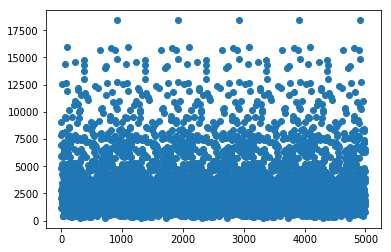

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X.index, X['Credit_Amount'])

In [19]:
li = list(X['Credit_Amount'].sort_values()[-5:].index)

In [20]:
X['Credit_Amount'][li] = int(X.drop(li)['Credit_Amount'].mean())

c:\users\abhilash\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


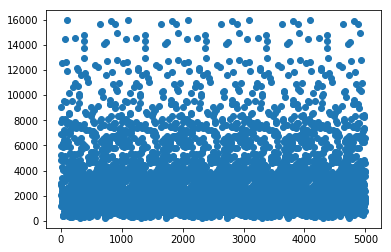

In [21]:
plt.scatter(X.index, X['Credit_Amount'])

In [23]:
X.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [24]:
encoder = preprocessing.LabelEncoder()

for i in X.columns:
    if isinstance(X[i][0], str):
            X[i] = encoder.fit_transform(X[i])

In [25]:
X.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

c:\users\abhilash\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


const                          58.892670
Status_Checking_Acc             1.139096
Duration_in_Months              1.925800
Credit_History                  1.357396
Purposre_Credit_Taken           1.072977
Credit_Amount                   2.228846
Savings_Acc                     1.100208
Years_At_Present_Employment     1.196142
Inst_Rt_Income                  1.302146
Marital_Status_Gender           1.067881
Other_Debtors_Guarantors        1.072735
Current_Address_Yrs             1.184206
Property                        1.396762
Age                             1.305332
Other_Inst_Plans                1.052666
Housing                         1.307878
Num_CC                          1.304571
Job                             1.331433
Dependents                      1.083040
Telephone                       1.272943
Foreign_Worker                  1.078167
dtype: float64

In [28]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

Credit_Amount                   0.000000e+00
Status_Checking_Acc            4.303013e-133
Credit_History                  1.873780e-65
Duration_in_Months              1.429318e-61
Savings_Acc                     2.005236e-37
Age                             1.227006e-33
Purposre_Credit_Taken           3.985377e-32
Property                        1.702444e-26
Housing                         6.229983e-21
Years_At_Present_Employment     5.621205e-19
Other_Inst_Plans                5.957742e-15
Marital_Status_Gender           6.541125e-10
Foreign_Worker                  1.216850e-08
Other_Debtors_Guarantors        5.880412e-08
Inst_Rt_Income                  2.214123e-06
Num_CC                          5.498509e-03
Telephone                       1.541937e-02
Job                             2.144243e-02
Current_Address_Yrs             3.772547e-01
Dependents                      9.167256e-01
const                           1.000000e+00
dtype: float64

In [27]:
import scipy.stats as stats
stats.f_oneway(X['Credit_Amount'],y)

F_onewayResult(statistic=6855.109699626198, pvalue=0.0)